# COVID-19 Research Papers LDA Topic Modeling

Use the LDA model to create topics, or clusters, present in the dataset using the abstracts of the papers. Each topic corresponds to a set of word-probability pairs, and I chose to use the top 15 highest probability words of each topic to represent the given topic. Each paper is assigned a topic based on how many of the top 15 words of each topic are included in the abstract, and how often.

In [1]:
import numpy as np
import pandas as pd
import json
import itertools
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import nltk
from nltk.stem.snowball import SnowballStemmer
#from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords 
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

import re

import gensim
from gensim import corpora, models

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jayfeng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jayfeng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jayfeng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
unable to import 'smart_open.gcs', disabling that module


In [2]:
"""Reads in abstracts.csv and filters out rows with missing values."""

df = pd.read_csv("abstracts.csv")
df = df[df["abstract"] != "NaN"]
df = df.dropna()

In [3]:
"""Set up stop words, stemmer, and lemmatizer."""

stop_words = set(stopwords.words('english')) 
snowBallStemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

In [4]:
"""Tokenize and clean the abstracts of every paper."""

def tokenize_clean(abstract):
    #tokenizes abstract string
    tokens = word_tokenize(abstract.lower())
    
    #lemmatizes tokens
    counter = 0
    while counter < len(tokens):
        tokens[counter] = lemmatizer.lemmatize(tokens[counter])
        counter += 1
    
    #filters, stems, and lowercases tokens
    filtered_tokens = []
    for i in tokens:
        if i not in stop_words and len(i) > 3 and i != "abstract":
            stemmed_word = snowBallStemmer.stem(i)
            filtered_tokens.append(stemmed_word)
    
    return filtered_tokens

df["abstract tokens"] = df.apply(lambda row: tokenize_clean(row.abstract), axis=1)

In [5]:
"""Perform LDA topic modelling on a sample of the papers for speed purposes."""

partial_df = df#.sample(3000)

In [6]:
"""Create a list of lists of cleaned tokens of abstracts"""

partial_texts = []
for index, row in partial_df.iterrows():
    partial_texts.append(row[3])

In [7]:
"""Use gensim package to perform LDA topic modelling.
Code from https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
used for reference.
"""

dictionary = corpora.Dictionary(partial_texts)
dictionary.filter_extremes(no_below=3)

corpus = [dictionary.doc2bow(text) for text in partial_texts]

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word = dictionary, passes=50)

In [8]:
lda_results = ldamodel.show_topics(num_topics=10, num_words=15, formatted=False)
lda_results

[(0,
  [('infect', 0.029875187),
   ('virus', 0.027869917),
   ('respiratori', 0.027132407),
   ('child', 0.016713811),
   ('detect', 0.016635578),
   ('sampl', 0.014467312),
   ('viral', 0.01351699),
   ('studi', 0.011558705),
   ('clinic', 0.010453718),
   ('influenza', 0.0093995575),
   ('pathogen', 0.008929059),
   ('test', 0.008672366),
   ('posit', 0.008011197),
   ('result', 0.007497544),
   ('caus', 0.0073344884)]),
 (1,
  [('vaccin', 0.054091424),
   ('antibodi', 0.031321872),
   ('virus', 0.027251525),
   ('influenza', 0.022997992),
   ('immun', 0.020464024),
   ('mers-cov', 0.017156385),
   ('infect', 0.017047288),
   ('respons', 0.01308084),
   ('human', 0.012080422),
   ('protect', 0.011556118),
   ('antigen', 0.011030099),
   ('develop', 0.009677706),
   ('serum', 0.00877985),
   ('high', 0.00867513),
   ('respiratori', 0.008587528)]),
 (2,
  [('use', 0.027667267),
   ('method', 0.016969249),
   ('detect', 0.013250452),
   ('result', 0.011102172),
   ('assay', 0.011002941

In [9]:
"""Create topic_words, a list of buckets of words that represent each topic."""

topic_words = []
#i is each topic
for i in lda_results:
    topic_i_words = []
    word_pairs = i[1]
    #j is the list of word-probability pairs (we don't care about the probabilities here)
    for j in word_pairs:
        topic_i_words.append(j[0])
    topic_words.append(topic_i_words)
        
topic_words   

[['infect',
  'virus',
  'respiratori',
  'child',
  'detect',
  'sampl',
  'viral',
  'studi',
  'clinic',
  'influenza',
  'pathogen',
  'test',
  'posit',
  'result',
  'caus'],
 ['vaccin',
  'antibodi',
  'virus',
  'influenza',
  'immun',
  'mers-cov',
  'infect',
  'respons',
  'human',
  'protect',
  'antigen',
  'develop',
  'serum',
  'high',
  'respiratori'],
 ['use',
  'method',
  'detect',
  'result',
  'assay',
  'test',
  'sensit',
  'studi',
  'sampl',
  'specif',
  'develop',
  'perform',
  'predict',
  'model',
  'analysi'],
 ['protein',
  'activ',
  'structur',
  'cell',
  'bind',
  'membran',
  'domain',
  'peptid',
  'sars-cov',
  'acid',
  'interact',
  'inhibit',
  'fusion',
  'inhibitor',
  'show'],
 ['sequenc',
  'virus',
  'strain',
  'genom',
  'gene',
  'analysi',
  'isol',
  'coronavirus',
  'pedv',
  'genet',
  'speci',
  'mutat',
  'region',
  'differ',
  'studi'],
 ['cell',
  'infect',
  'mous',
  'activ',
  'express',
  'respons',
  'immun',
  'effect',


In [10]:
"""Assign a topic to each of the papers."""

assigned_topic = []
for index, row in partial_df.iterrows():
    tokens = row["abstract tokens"]
    counter_array = [0] * 15
    for i in tokens:
        for j in np.arange(10):
            if i in topic_words[j]:
                counter_array[j] += 1
    max_topic = counter_array.index(max(counter_array))
    assigned_topic.append(max_topic)
                
partial_df["assigned topic"] = assigned_topic
partial_df = partial_df.sort_values("assigned topic")
partial_df

Unnamed: 0                                       sha  \
20798       21718  8589358e390499b6c9d95a5eb20b0bfb4bc75466   
18613       19515  be57ba746b8fec268025df6afc68536fbd0188d8   
23665       24623  704eebd9653b61d2dfbe1483d1a616e6836eeec8   
4804         6456  7440e73586a86e38a773cb529bca7ffef7a1afb0   
18601       19503  c56ffdaf1cfbae5a6ed0abea495eaf7fa1cbc031   
...           ...                                       ...   
11475       14504  b001ccf1b6c3a6bf6b6928a619a04cebae6c45a8   
23293       24245  c383b8dedcefbf78e370b0152058176d9219330e   
23292       24244  de1c5a16a75d5c28d9e3a9be2e928406fee458e4   
23304       24256  543eecd34daf0351160934011c8da277b883b56c   
23627       24585  69b7df3f6f4dd18c96e2d6b064e7ee3190cd54d0   

                                                abstract  \
20798  A 23-year-old healthy male volunteer took part...   
18613  Chloroquine is a 9-aminoquinolone with well-kn...   
23665  Viscous sputum specimens usually cannot underg...   
4804   Abstract Screening of the proteome of microdis...   
18601  BACKGROUND: The emergence of severe acute resp...   
...                                                  ...   
11475  Summary Type I interferon (IFN) is critical fo...   
23293  Tacaribe virus (TCRV) is a mammalian arenaviru...   
23292  TRIM25 is an E3 ubiquitin ligase enzyme that i...   
23304  The innate antiviral response is integral in p...   
23627  RNA viruses are a major threat to human health...   

                                         abstract tokens  assigned topic  
20798  [23-year-old, healthi, male, volunt, took, par...               0  
18613  [chloroquin, 9-aminoquinolon, well-known, anti...               0  
23665  [viscous, sputum, specimen, usual, undergo, au...               0  
4804   [screen, proteom, microdissect, glutathion, s-...               0  
18601  [background, emerg, sever, acut, respiratori, ...               0  
...                                                  ...             ...  
11475  [summari, type, interferon, critic, control, p...               9  
23293  [tacarib, virus, tcrv, mammalian, arenavirus, ...               9  
23292  [trim25, ubiquitin, ligas, enzym, involv, vari...               9  
23304  [innat, antivir, respons, integr, protect, hos...               9  
23627  [virus, major, threat, human, health, base, ex...               9  

[24045 rows x 5 columns]

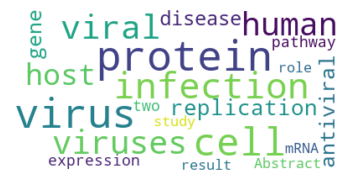

In [38]:
cluster3 = partial_df[partial_df["assigned topic"] == 9]
abstractStrings = cluster3.sample(100)["abstract"].values
wordCloudString = ""
for i in np.arange(100):
    wordCloudString += abstractStrings[i]
    
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
    
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(wordCloudString)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [11]:
partial_df.to_csv("document_clusters.csv")